# <font color='green'>Challenge Data Science 1.0 </font>

> Desenvolver um conjunto de análises e modelos de machine learning supervisionado para auxiliar o time de vendas a fidelizar clientes.
    

## 1.0 Coleta de dados via API

In [1]:
# Importando módulos necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
# Configurando os avisos
warnings.filterwarnings('ignore')

In [3]:
# Setando a URL da API
uri = 'https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json'

# Lendos os dados crus em formato json
raw_data = pd.read_json(uri)

In [4]:
# Visualizando as 5 primeiras observações dos dados
raw_data.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## 2.0 Limpeza de dados

### 2.1 Criando novas variáveis

In [5]:
# Função para extrair dados da API
def extract_value(dataframe, variable):
    return dataframe[variable].apply(lambda dictionary : pd.Series(dictionary))

In [6]:
# Criando novas variáveis extraindo dados dos dicionários em cada célula
for variable in raw_data.columns[2:]:
    tmp_dataframe = extract_value(raw_data, variable)

    raw_data = pd.concat([raw_data, tmp_dataframe], axis=1)

In [7]:
# Criando dataset final
df = pd.concat([raw_data, extract_value(raw_data, 'Charges')], axis=1)

In [8]:
df.head()

,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges,Monthly,Total
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,...,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}",65.6,593.3
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}",59.9,542.4
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}",73.9,280.85
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}",98.0,1237.85
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}",83.9,267.4


In [9]:
# Removendo variáveis não mais necessárias
df.drop(['customer', 'phone', 'internet', 'account', 'Charges'], axis=1, inplace=True)

### 2.2 Explorando dados nulos

In [10]:
# Verificando dados propriamente nulos
df.isna().sum()

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Monthly             0
Total               0
dtype: int64

In [13]:
# Função para verificação de valores unicos
def check_unique_values():
    for variable in df.columns:
        format_string = f'{variable} : {df[variable].unique()}'

        print(format_string)

In [14]:
# Verificando valores
check_unique_values()

customerID : ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn : ['No' 'Yes' '']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['Yes' 'No']
tenure : [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
PhoneService : ['Yes' 'No']
MultipleLines : ['No' 'Yes' 'No phone service']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['Yes' 'No' 'No internet service']
StreamingTV : ['Yes' 'No' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['One year' 'Month-to-month' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Mailed check' 'El

In [15]:
# Eliminando strings vazias
df.replace({'' : 0, ' ' : 0}, inplace=True)

In [16]:
check_unique_values()

customerID : ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn : ['No' 'Yes' 0]
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['Yes' 'No']
tenure : [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
PhoneService : ['Yes' 'No']
MultipleLines : ['No' 'Yes' 'No phone service']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['Yes' 'No' 'No internet service']
StreamingTV : ['Yes' 'No' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['One year' 'Month-to-month' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Mailed check' 'Ele

In [17]:
# Modificando dtypes
df['Total'] = pd.to_numeric(df['Total'])

### 2.3 Gerando dummies

In [18]:
# Tratando variáveis
df.replace({'Yes' : 1, 'No' : 0, 'Male' : 1, 'Female' : 0}, inplace=True)

In [19]:
# Gerando dummies
df = pd.get_dummies(df.iloc[:, 1:])

## 3.0 Explorando dados

### 3.1 Tratando dados para exploração

In [20]:
df.head(20)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Monthly,Total,...,StreamingMovies_0,StreamingMovies_1,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,1,9,1,1,65.60,593.30,...,1,0,0,0,1,0,0,0,0,1
1,0,1,0,0,0,9,1,0,59.90,542.40,...,0,1,0,1,0,0,0,0,0,1
2,1,1,0,0,0,4,1,1,73.90,280.85,...,1,0,0,1,0,0,0,0,1,0
3,1,1,1,1,0,13,1,1,98.00,1237.85,...,0,1,0,1,0,0,0,0,1,0
4,1,0,1,1,0,3,1,1,83.90,267.40,...,1,0,0,1,0,0,0,0,0,1
5,0,0,0,0,1,9,1,1,69.40,571.45,...,0,1,0,1,0,0,0,1,0,0
6,0,0,1,1,0,71,1,1,109.70,7904.25,...,0,1,0,0,0,1,1,0,0,0
7,0,1,0,1,0,63,1,1,84.65,5377.80,...,1,0,0,0,0,1,0,1,0,0
8,0,0,1,0,0,7,1,1,48.20,340.35,...,1,0,0,1,0,0,0,0,1,0
9,0,0,0,1,1,65,1,1,90.45,5957.90,...,0,1,0,0,0,1,0,0,0,1


In [21]:
# Explorando quantos clientes são mulheres/homens (frequência)
df['gender'].value_counts()

1    3675
0    3592
Name: gender, dtype: int64

In [22]:
# Explorando quantos clientes são mulheres/homens (proporção)
df['gender'].value_counts(normalize=True) * 100

1    50.571075
0    49.428925
Name: gender, dtype: float64

In [23]:
# Há um desbalanceamento nos churns
num_churns = df['Churn'].value_counts()

In [24]:
def is_categorical(data):
    if data == 0 or data == 1:
        return True
    else:
        return False

In [25]:
churn_zero = pd.DataFrame({0, 1})

for var in df.columns[1:]:
    if is_categorical(df[var][0]):
        churn_zero[var] = df.groupby(by='Churn')[var].value_counts()[0]
        
churn_zero

,0,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_0,MultipleLines_1,MultipleLines_No phone service,...,StreamingMovies_0,StreamingMovies_1,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,2653,4692,2549,3543,537,2487,2752,3183,4861,...,3466,3400,3930,3048,4045,3703,4067,4062,4024,4041
1,1,2745,706,2849,1855,4861,2911,2646,2215,537,...,1932,1998,1468,2350,1353,1695,1331,1336,1374,1357


In [26]:
churn_ones = pd.DataFrame({0, 1})

for var in df.columns[1:]:
    if is_categorical(df[var][0]):
        churn_ones[var] = df.groupby(by='Churn')[var].value_counts()[1]
        
churn_ones

,0,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_0,MultipleLines_1,MultipleLines_No phone service,...,StreamingMovies_0,StreamingMovies_1,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,939,1393,1200,1543,170,469,1020,1019,1699,...,931,1051,1756,214,1703,1821,1611,1637,798,1561
1,1,930,476,669,326,1699,1400,849,850,170,...,938,818,113,1655,166,48,258,232,1071,308


In [38]:
churn_zero = churn_zero.rename(columns={0 : 'Categorical'})
churn_ones = churn_ones.rename(columns={0 : 'Categorical'})

### 3.2 Exploração gráfica de dados

In [69]:
def compare_frequency_categories(df, variable, title, xlabel, ylabel):

    ax = sns.barplot(x = df.index, y = df[variable])

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    return ax

<AxesSubplot:title={'center':'Frequência de homens e mulheres'}, xlabel='Gênero', ylabel='Frequência'>

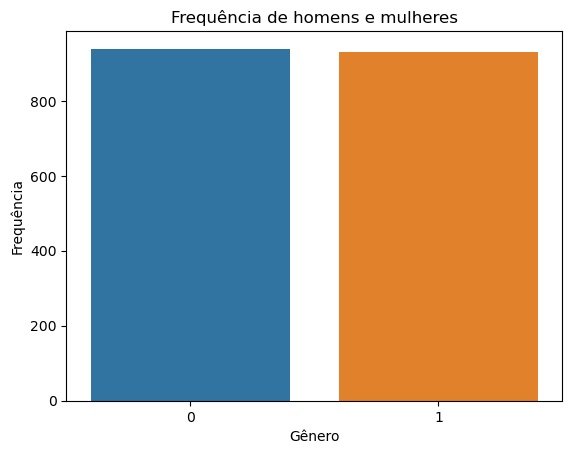

In [71]:
compare_frequency_categories(churn_ones, 'gender', 'Frequência de homens e mulheres', 'Gênero', 'Frequência')

In [62]:
values = churn_ones.diff().iloc[1, :]

# Verificando valores importantes
values[values.apply(lambda x : abs(x) > 1000)].index

Index(['Dependents', 'PhoneService', 'MultipleLines_No phone service',
       'InternetService_0', 'OnlineSecurity_0', 'OnlineSecurity_1',
       'OnlineSecurity_No internet service',
       'OnlineBackup_No internet service',
       'DeviceProtection_No internet service', 'TechSupport_0',
       'TechSupport_1', 'TechSupport_No internet service',
       'StreamingTV_No internet service',
       'StreamingMovies_No internet service', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check'],
      dtype='object')

<AxesSubplot:title={'center':'Frequência de dependentes'}, xlabel='Dependente?', ylabel='Frequência'>

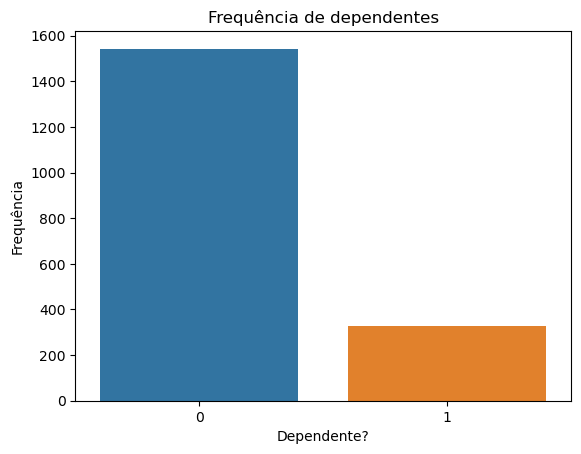

In [74]:
compare_frequency_categories(churn_ones, 'Dependents', 'Frequência de dependentes', 'Dependente?', 'Frequência')

<AxesSubplot:title={'center':'Frequência de serviço de telefone'}, xlabel='Telefone?', ylabel='Frequência'>

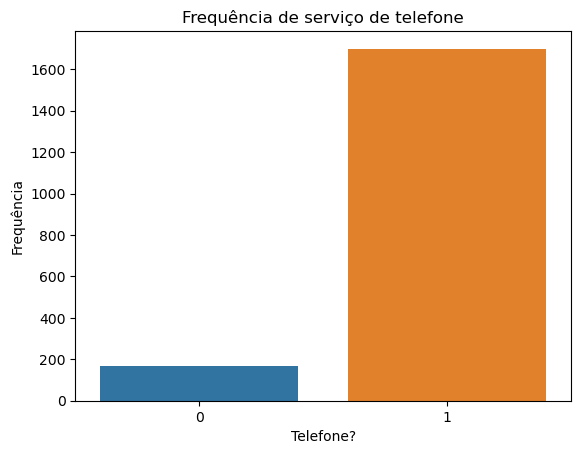

In [75]:
compare_frequency_categories(churn_ones, 'PhoneService', 'Frequência de serviço de telefone', 'Telefone?', 'Frequência')

## 4.0 Modelo de machine learning

### 4.1 Separando dados de treino e teste

In [88]:
from sklearn.model_selection import train_test_split

x = df.drop(['Churn'], axis=1)
y = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=101)

### 4.2 Criando uma base

In [102]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()

dummy.fit(x_train, y_train)

dummy.score(x_test, y_test)

0.7429829389102917

### 4.3 Criando o DecisionTreeClassifier

In [114]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier(max_depth=5)

decision_tree_classifier.fit(x_train, y_train)

decision_tree_classifier.score(x_test, y_test)

0.7908640616400661

###  4.4 Criando o KNeighborsClassifier

In [110]:
from sklearn.neighbors import KNeighborsClassifier

kneighbors_classifier = KNeighborsClassifier(n_neighbors=10)

kneighbors_classifier.fit(x_train, y_train)

kneighbors_classifier.score(x_test, y_test)

0.7837094111172263

### 4.5 Criando o LogisticRegression

In [134]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()

logistic_regression.fit(x_train, y_train)

logistic_regression.score(x_test, y_test)

0.8057237204182719

### 4.6 Avaliando métricas

In [128]:
from sklearn import metrics

In [172]:
metrics.precision_score(y_true=y_test, y_pred=decision_tree_classifier.predict(x_test))

0.6246418338108882

In [138]:
metrics.precision_score(y_true=y_test, y_pred=kneighbors_classifier.predict(x_test))

0.6390977443609023

In [139]:
metrics.precision_score(y_true=y_test, y_pred=logistic_regression.predict(x_test))

0.651595744680851

In [131]:
metrics.precision_score(y_true=y_test, y_pred=dummy.predict(x_test))

0.0

In [161]:
features_importantes = decision_tree_classifier.feature_importances_ > 0

i = 0
for var in x.columns:
    if features_importantes[i]:
        print(var)
    i += 1

gender
SeniorCitizen
tenure
PhoneService
Monthly
Total
InternetService_Fiber optic
TechSupport_0
TechSupport_1
StreamingTV_0
StreamingMovies_0
StreamingMovies_1
Contract_Month-to-month
Contract_One year
PaymentMethod_Electronic check


In [166]:
features_importantes = [   
    "gender",  
    "SeniorCitizen", 
    "tenure",   
    "PhoneService",    
    "Monthly",    
    "Total",    
    "InternetService_Fiber optic",   
    "TechSupport_0",  
    "TechSupport_1",  
    "StreamingTV_0",  
    "StreamingMovies_0",   
    "StreamingMovies_1",    
    "Contract_Month-to-month",  
    "Contract_One year"
]

In [169]:
x = x[features_importantes]

In [175]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=101)

In [177]:
def calculate_metrics(model):
    model.fit(x_train, y_train)
    
    accuracy = model.score(x_test, y_test)
    
    precision = metrics.precision_score(y_true=y_test, y_pred=model.predict(x_test))
    
    return {'accuracy' : accuracy, 'precision' : precision}

In [199]:
calculate_metrics(DecisionTreeClassifier(max_depth=5))

{'accuracy': 0.7908640616400661, 'precision': 0.6246418338108882}

In [198]:
calculate_metrics(LogisticRegression())

{'accuracy': 0.7919647771051184, 'precision': 0.6161879895561357}

In [197]:
calculate_metrics(KNeighborsClassifier())

{'accuracy': 0.779306549257017, 'precision': 0.5916666666666667}

In [206]:
from sklearn.ensemble import RandomForestClassifier

calculate_metrics(RandomForestClassifier(max_depth=5))

{'accuracy': 0.7969179966978536, 'precision': 0.657051282051282}

In [208]:
from sklearn.svm import SVC

calculate_metrics(SVC())

{'accuracy': 0.7429829389102917, 'precision': 0.0}

In [210]:
from sklearn.naive_bayes import BernoulliNB

calculate_metrics(BernoulliNB())

{'accuracy': 0.7336268574573472, 'precision': 0.4872944693572496}

# <font color='#00AAAA'>Finalização